# Q1

In [172]:
text = open("A4_question1_data.txt").read()

In [58]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yitongfeng/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [73]:
# text clean
text=text.replace(',',' ')
text=text.replace('[',' ')
text=text.replace(']',' ')
text=text.replace('.',' ')
text=text.replace(':',' ')
text=text.replace(';',' ')
text=text.replace('?',' ')
text=text.replace('!',' ')
texts = word_tokenize(text)


(1) average word length

In [76]:
num=0
sum=0
for i in range(len(texts)):   
    word = texts[i]
    t=len(word)
    sum=t+sum
print(sum/len(texts))

4.169155861918048


the average word length is 4.169155861918048

 (2) average sentence length 

In [ ]:
text = open("A4_question1_data.txt").read()

In [85]:
sentences = nltk.sent_tokenize(text)
print(len(texts)/len(sentences))

12.477133105802048


the average sentence length is 12.477133105802048

(3) the number of times the word “king” appears

In [90]:
print(text.count("king")+text.count("King")+text.count("KING"))

96


the number of times the word “king” appears 96 times in the text

TF-IDF scores of all the words

In [48]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [92]:
#Read Text
with open("A4_question1_data.txt", 'r') as fh:  
    descriptions = fh.read().splitlines()

In [98]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
### Get Tfidf Scores
from sklearn.feature_extraction.text import TfidfVectorizer
#Custom tokenizer that will perform tokenization, stopword removal
#and lemmatization
def customtokenize(str):
    tokens=nltk.word_tokenize(str)
    ntokens = nltk.RegexpTokenizer(r"\w+")
    words = ntokens.tokenize(str)
    nostop = list(filter(lambda token: token not in stopwords.words('english'), words))
    lemmatized=[lemmatizer.lemmatize(word) for word in nostop ]
    return lemmatized

# #Generate TFIDF matrix
vectorizer = TfidfVectorizer(tokenizer=customtokenize)
tfidf=vectorizer.fit_transform(descriptions)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yitongfeng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yitongfeng/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/yitongfeng/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [191]:
feature_names = vectorizer.get_feature_names()
dense = tfidf.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)
tfidf_score = df.T.sum(axis=1)
tfidf_score.reset_index
tfidf_score = dict(tfidf_score)
tfidf_score = dict(sorted(tfidf_score.items(), key=lambda x: x[1], reverse=True))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [192]:
# export to csv file
import csv
my_dict = tfidf_score
with open('tfidf_score.csv', 'w') as f:
    for key in my_dict.keys():
        f.write("%s,%s\n"%(key,my_dict[key]))

the top 100 TF-IDF terms 

In [130]:
text = open("A4_question1_data.txt").read()

In [134]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

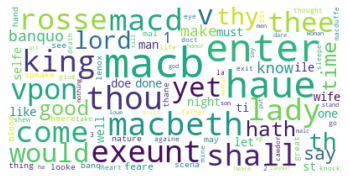

In [135]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").fit_words(tfidf_score)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Q2

In [163]:
#load data and libraries
from sklearn.datasets import fetch_rcv1 
rcv1 = fetch_rcv1()
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression

In [154]:
X = pd.DataFrame.sparse.from_spmatrix(rcv1['data'])
y = pd.DataFrame.sparse.from_spmatrix(rcv1['target'], columns=rcv1['target_names'])
X

,0,1,2,3,4,5,6,7,8,9,...,47226,47227,47228,47229,47230,47231,47232,47233,47234,47235
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
804410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
804411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
804412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
y.columns

Index(['C11', 'C12', 'C13', 'C14', 'C15', 'C151', 'C1511', 'C152', 'C16',
       'C17',
       ...
       'M11', 'M12', 'M13', 'M131', 'M132', 'M14', 'M141', 'M142', 'M143',
       'MCAT'],
      dtype='object', length=103)

In [159]:
#get data from dataset as train and as test 
train = fetch_rcv1(subset='train') 
test = fetch_rcv1(subset='test')
#Splitting Data into Training and Test Sets
X_train = train.data 
X_test = test.data   
# choose a category: C14 as positive class
y_train = y_train.getcol(4).toarray()
y_test = y_test.getcol(4).toarray()

In [164]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)
# fit the model with data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [168]:
# Use score method to get accuracy of model
score = logreg.score(X_test, y_test)
print(score)

0.9577851305254939


apply kbest to select top 10 best features

In [176]:
from sklearn.feature_selection import SelectKBest, chi2
y=y['C14']
X_new = SelectKBest(chi2, k=10).fit_transform(rcv1['data'], y)

In [177]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, train_size=0.7, random_state=50)

In [178]:
# choose Logistic Regression fit model
logreg = LogisticRegression(random_state=16)
# fit the model with data
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [179]:
# Use score method to get accuracy of model
score = logreg.score(X_test, y_test)
print(score)

0.9919651921682379


Error analysis

In [181]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[238751,    336],
       [  1603,    635]])

Text(0.5, 257.44, 'Predicted label')

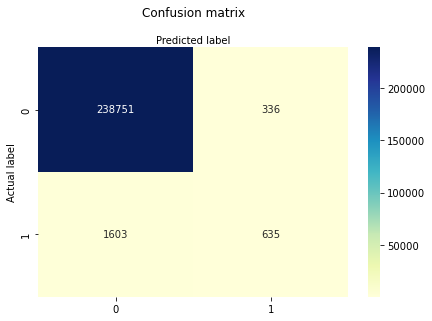

In [183]:
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [185]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    239087
           1       0.65      0.28      0.40      2238

    accuracy                           0.99    241325
   macro avg       0.82      0.64      0.70    241325
weighted avg       0.99      0.99      0.99    241325

